# Libraries

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation, digits
from sklearn.feature_extraction.text import CountVectorizer
import locale

locale.setlocale(locale.LC_TIME, "es_ES")
pd.set_option('max_colwidth', 150)

In [2]:
text_file = open("./Data/stop_words.txt", "r", encoding='utf-8')

stop_words = text_file.readlines()
for i, word in enumerate(stop_words):
    stop_words[i] = word.replace('\n', '')

nltk_stopwords = stopwords.words('spanish')
other_stopwords = ['lópezgatell', 'lópez', 'hugo', 'gatell','ciento',
                   'mil', 'doctor', 'gracias', 'josé', 'luis', 'ramírez',
                   'ricardo', 'cortés', 'alcalá', 'alomía', 'zegarra',
                   'director', 'general', 'subsecretario', 'gustavo',
                   'reyes', 'terán', 'conferencia', 'diapositiva',
                   'persona', 'día', 'importante', 'méxico',
                  'andrés', 'manuel', 'obrador']

spanish_stopwords = set(stop_words + nltk_stopwords + other_stopwords)

non_words = list(punctuation)
non_words.extend(digits)
non_words.extend(['¿', '¡', '°', '‘', '’', 'º'])

In [3]:
def clean_text(text, tokenize=True):
    text = ''.join([c for c in text if c not in non_words])
    text = text.replace('\n', ' ')
    text = text.strip()

    if tokenize:
        tokens = word_tokenize(text.lower(), 'spanish')
    else:
        tokens = text.lower()
    
    return tokens

clean = lambda x: clean_text(x, tokenize=False)

vectorizer = CountVectorizer(
    analyzer='word',
    tokenizer=clean_text,
    stop_words=spanish_stopwords,
    ngram_range=(1,1),
    min_df=.1
)

In [4]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=spanish_stopwords, background_color="#D3D3D3",
               colormap="Dark2", max_font_size=150, random_state=42,
               width=800, height=600,
               collocation_threshold=1, max_words=50)

# Data

### COVID Conferences

In [5]:
COVID = pd.read_csv('./Data/COVID.csv')
COVID['date'] = pd.to_datetime(COVID['dates'], format='%d de %B de %Y')
COVID.sort_values(["date"], inplace = True)
COVID.head()

,Unnamed: 0,titles,dates,texts,date
446,1100,Versión estenográfica | Conferencia de prensa. Secretaría de Salud. Informe diario sobre coronavirus COVID-19 en México,28 de febrero de 2020,HUGO LÓPEZ-GATELL RAMÍREZ SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD: Muy buenas noches.\nVamos a iniciar con la conferencia de prensa so...,2020-02-28
445,1097,Versión estenográfica| Conferencia de prensa. Informe diario COVID-19 en México. Secretaría de Salud,29 de febrero de 2020,HUGO LÓPEZ-GATELL RAMÍREZ SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD: Buenas noches. Ya son menos que ayer.\nMuy bien vamos a empezar con...,2020-02-29
444,1095,Versión estenográfica. Conferencia de prensa. Informe diario COVID-19 en México. Secretaría de Salud,01 de marzo de 2020,HUGO LÓPEZ-GATELL RAMÍREZ SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD: Muy buenas noches tengan todas y todos ustedes buenas noches a la c...,2020-03-01
443,1093,Versión estenográfica | Conferencia de prensa. Informe diario sobre coronavirus COVID-19 en México. Secretaría de Salud,02 de marzo de 2020,JOSÉ LUIS ALOMÍA ZEGARRA DIRECTOR GENERAL DE EPIDEMIOLOGÍA: Muy buenas tardes a todas y todos.\nGracias por estar nuevamente y tan puntuales como ...,2020-03-02
442,1091,Versión estenográfica | Conferencia de prensa. Informe diario sobre coronavirus COVID-19 en México. Secretaría de Salud,03 de marzo de 2020,JOSÉ LUIS ALOMÍA ZEGARRA DIRECTOR GENERAL DE EPIDEMIOLOGÍA: Muy buenas tardes a todas y todos.\nAquí estamos nuevamente como todos los días ya des...,2020-03-03


Select relevant dates

In [6]:
end = '2020-12-31'
COVID = COVID[COVID["date"] <= end]
COVID.tail()

,Unnamed: 0,titles,dates,texts,date
157,445,Versión estenográfica. Conferencia de prensa. Informe diario sobre coronavirus COVID-19 en México,23 de diciembre de 2020,RUY LÓPEZ RIDAURA DIRECTOR GENERAL DEL CENTRO NACIONAL DE PROGRAMAS PREVENTIVOS Y CONTROL DE ENFERMEDADES (CENAPRECE): Buenas noches. Soy el docto...,2020-12-23
156,443,Versión estenográfica. Conferencia de prensa. Informe diario sobre coronavirus COVID-19 en México,24 de diciembre de 2020,HUGO LÓPEZ-GATELL RAMÍREZ SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD: Muy buenas noches son las 19 con un minuto 19 horas un minuto de es...,2020-12-24
155,441,Versión estenográfica. Conferencia de prensa. Informe diario sobre coronavirus COVID-19 en México,28 de diciembre de 2020,RUY LÓPEZ RIDAURA DIRECTOR GENERAL DEL CENTRO NACIONAL DE PROGRAMAS PREVENTIVOS Y CONTROL DE ENFERMEDADES (CENAPRECE): Hola buenas noches. soy el ...,2020-12-28
154,439,Versión estenográfica. Conferencia de prensa. Informe diario sobre coronavirus COVID-19 en México,29 de diciembre de 2020,HUGO LÓPEZ-GATELL RAMÍREZ SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD: Son las 19 horas con un minuto de este martes 29 de diciembre de 20...,2020-12-29
153,437,Versión estenográfica. Conferencia de prensa. Informe diario sobre coronavirus COVID-19 en México,30 de diciembre de 2020,RUY LÓPEZ RIDAURA DIRECTOR GENERAL DEL CENTRO NACIONAL DE PROGRAMAS PREVENTIVOS Y CONTROL DE ENFERMEDADES (CENAPRECE): Buenas noches. Bienvenidos....,2020-12-30


#### Corpus

In [7]:
df_corp = COVID[['titles', 'texts']]
df_corp.index = COVID['date']
df_corp['texts'] = df_corp['texts'].apply(clean)

df_corp["value"] = "n"
df_corp = df_corp.groupby(["value"]).sum()

<ipython-input-7-5fad51832c0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corp['texts'] = df_corp['texts'].apply(clean)
<ipython-input-7-5fad51832c0f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corp["value"] = "n"


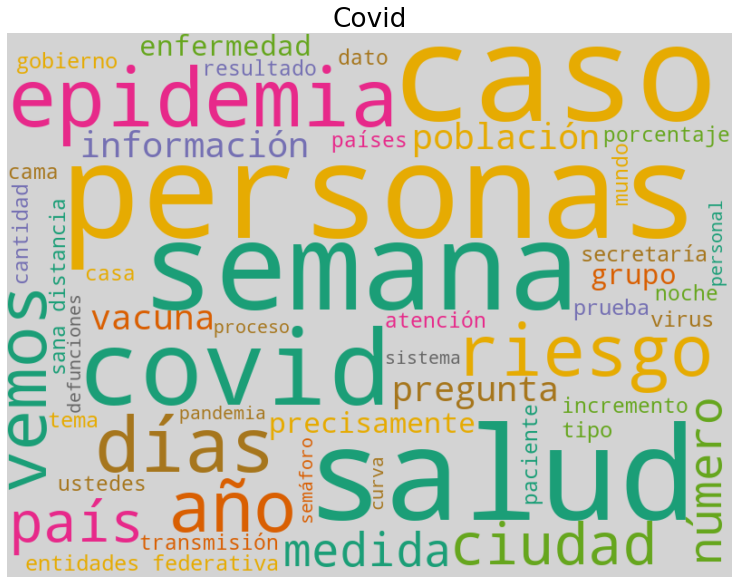

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

wc.generate(df_corp['texts'].iloc[0])
p = plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Covid")
p.savefig('COVID.jpg')

## AMLO

In [9]:
Daily = pd.read_csv('./Data/DAILY.csv')
Daily['date'] = pd.to_datetime(Daily['dates'], format='%d de %B de %Y')
Daily.sort_values(["date"], inplace = True)
Daily.head()

,Unnamed: 0,titles,dates,texts,date
740,1187,Versión estenográfica | Diálogo con los pueblos otomí náhuatl totonaco y tepehua en Puebla,04 de enero de 2020,MODERADOR: A continuación se llevará a cabo la ceremonia tradicional indígena ñuju.\n(CEREMONIA TRADICIONAL INDÍGENA ÑUJU)\nMODERADOR: Preside es...,2020-01-04
739,1186,Versión estenográfica | Diálogo con pueblos indígenas. Avances programa Universidades para el Bienestar ‘Benito Juárez García’,05 de enero de 2020,MODERADOR: Preside este evento Diálogo con los pueblos náhuatl otomí tepehua y huasteco avances del programa Universidades para el Bienestar Benit...,2020-01-05
738,1185,Versión estenográfica | Diálogo con pueblos indígenas. Avances programa Universidades para el Bienestar ‘Benito Juárez García’,05 de enero de 2020,MODERADOR: En este momento se llevará a cabo la ceremonia tradicional náhuatl.\n(CEREMONIA TRADICIONAL NÁHUATL)\nMODERADOR: Preside este evento Di...,2020-01-05
735,1182,Versión estenográfica | Día de las Enfermeras y los Enfermeros,06 de enero de 2020,MODERADORA: Preside esta ceremonia del Día de las Enfermeras y los Enfermeros 2020 el presidente constitucional de los Estados Unidos Mexicanos li...,2020-01-06
737,1184,Versión estenográfica de la conferencia de prensa matutina | Lunes 6 de enero 2020,06 de enero de 2020,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos días. Ánimo en el 2020 así lo acaba de decir Ricardo.\nBueno vamos a tratar algunos temas:\nPrimer...,2020-01-06


In [10]:
end = '2020-12-31'
Daily = Daily[Daily["date"] <= end]
Daily.tail()

,Unnamed: 0,titles,dates,texts,date
287,444,Versión estenográfica. Conferencia de prensa del presidente Andrés Manuel López Obrador del 24 de diciembre de 2020,24 de diciembre de 2020,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos días.\nBueno pues hoy es una fecha especial que es la noche de Navidad este 24 de diciembre. Vamos ...,2020-12-24
286,442,Versión estenográfica. Conferencia de prensa del presidente Andrés Manuel López Obrador del 28 de diciembre de 2020,28 de diciembre de 2020,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Muy buenos días.\nPues es 28 de diciembre. Hoy lunes iniciamos la semana. Vamos a proceder como todos los ...,2020-12-28
285,440,Versión estenográfica. Conferencia de prensa del presidente Andrés Manuel López Obrador del 29 de diciembre de 2020,29 de diciembre de 2020,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Muy buenos días.\nEl día de hoy vamos a informar sobre el Pulso de la Salud en especial como lo hacemos to...,2020-12-29
284,438,Versión estenográfica. Conferencia de prensa del presidente Andrés Manuel López Obrador del 30 de diciembre de 2020,30 de diciembre de 2020,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos días.\nEl día de hoy 30 de diciembre antes de que concluya el año queremos presentar a ustedes el i...,2020-12-30
283,436,Versión estenográfica. Conferencia de prensa del presidente Andrés Manuel López Obrador del 31 de diciembre de 2020,31 de diciembre de 2020,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos días.\nEstamos finalizando el año 2020 y decidimos informar sobre la situación de seguridad que pre...,2020-12-31


In [11]:
df_corp = Daily[['titles', 'texts']]
df_corp.index = Daily['date']
df_corp['texts'] = df_corp['texts'].apply(clean)

df_corp["value"] = "n"
df_corp = df_corp.groupby(["value"]).sum()

<ipython-input-11-fb10fb4be840>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corp['texts'] = df_corp['texts'].apply(clean)
<ipython-input-11-fb10fb4be840>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corp["value"] = "n"


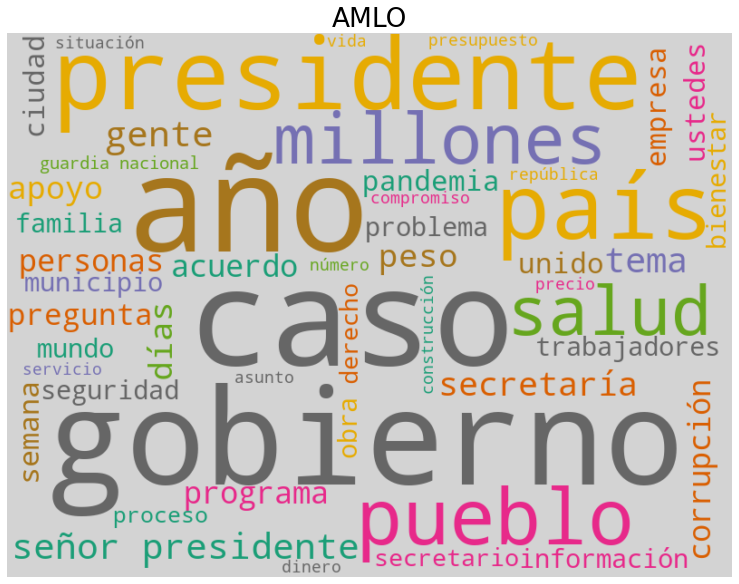

In [12]:
wc.generate(df_corp['texts'].iloc[0])
p = plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("AMLO")
p.savefig('DAILY.jpg')